In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 28.1 MB/s 


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [54]:
url="/content/drive/MyDrive/Cnn/data/motdong.jpg"

In [55]:
pixel=plt.imread(url)

In [56]:
detector=MTCNN()

In [57]:
face=detector.detect_faces(pixel)
for fac in face:
  print(fac)

5/5 [==============================] - 0s 49ms/step
{'box': [748, 517, 236, 339], 'confidence': 0.9999999403953552, 'keypoints': {'left_eye': (810, 657), 'right_eye': (911, 659), 'nose': (863, 707), 'mouth_left': (813, 769), 'mouth_right': (907, 772)}}
{'box': [1087, 974, 209, 292], 'confidence': 0.9999999403953552, 'keypoints': {'left_eye': (1146, 1085), 'right_eye': (1238, 1093), 'nose': (1188, 1138), 'mouth_left': (1144, 1190), 'mouth_right': (1226, 1194)}}
{'box': [1087, 69, 216, 284], 'confidence': 0.9999999403953552, 'keypoints': {'left_eye': (1146, 182), 'right_eye': (1241, 183), 'nose': (1193, 237), 'mouth_left': (1148, 279), 'mouth_right': (1237, 281)}}
{'box': [755, 99, 222, 289], 'confidence': 0.9999998211860657, 'keypoints': {'left_eye': (812, 208), 'right_eye': (914, 210), 'nose': (862, 269), 'mouth_left': (817, 314), 'mouth_right': (905, 315)}}
{'box': [387, 962, 235, 338], 'confidence': 0.999997079372406, 'keypoints': {'left_eye': (455, 1097), 'right_eye': (564, 1096), '

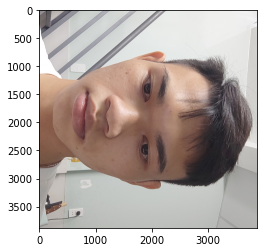

In [44]:
plt.imshow(pixel)
ax=plt.gca()
for fac in face:
  x,y,w,h=fac['box']
  rect=plt.Rectangle((x,y),w,h,fill=False,color='red')
  ax.add_patch(rect)
  for key,value in fac['keypoints'].items():
    dot=plt.Circle(value, radius=2, color='red')
    ax.add_patch(dot)
plt.show()

In [49]:

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

# img_path = 'elephant.jpg'
img = image.load_img(url, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02128385', 'leopard', 0.9987362), ('n02128925', 'jaguar', 0.0009042525), ('n02130308', 'cheetah', 0.00033047004)]


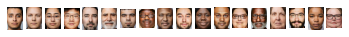

In [58]:
def draw_face(filename, result_list):
  data=plt.imread(filename)
  for i  in range(len(result_list)):
    x1,y1,w,h=result_list[i]['box']
    x2,y2=x1+w,y1+h
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()

draw_face(url, face)

